# Heat content animation

In [1]:
#Importer les modules essentiels

import os
import time as tm
import numpy as np # une librairie utile pour les calculs numériques
import xarray as xr # une librairie utile pour gérer les données
from matplotlib import pyplot as plt # une librairie utile pour tracer des figures
import cartopy.crs as ccrs # une librairie utile pour tracer des cartes
import cartopy.feature as cfeature # une librairie utile pour tracer les continents, océans, et frontières
from matplotlib.colors import BoundaryNorm # une librairie utilse pour tracer les "contours" avec pcolormesh
import scipy.stats as stats # pour le t-test
import matplotlib.ticker as mticker # pour manipuler l'affichage des lon et lat
from datetime import datetime
import pandas as pd
import cartopy.crs as ccrs
import matplotlib as mpl
import cartopy as cy
import matplotlib.animation as animation
import matplotlib.path as mpath
#import matplotlib.ticker as t
import cartopy.mpl.ticker as cticker
from cartopy.mpl.gridliner import Gridliner
import matplotlib.colors as colors
import matplotlib.path as mpath

Afin d'augmenter la taille de la police pour toutes les figures, on peut placer cette commande tout au début du _Notebook_ :

In [2]:
#plt.rcParams.update({'font.size': 15})

Pour la suite, s'il y a des difficultés à afficher le 'Heat content', cela vient du /1e6 dans la partie 'Calcul', ajouter ou enlever un . à la fin devrait régler le problème.  

## Initialisation

In [3]:
varin = np.array(['ohc300','fwc300'])  
names = np.array(['ohc','fwc'])

model = np.array(['CNRM-CM6-1','EC-Earth3'])
expe = np.array(['pa-pdSIC-ext', 'pa-futArcSIC-ext']) 
suffix = np.array(['r1i1p1f2', 'r1i1p1f1'])
grid = 'gn'

fyear = 2000
lyear = 2099
fdate = str(fyear) + '01'
ldate = str(lyear) + '12'

nmodel = len(model)
print('nmodel = '+str(nmodel))
nbyear = lyear-fyear+1
nom_expe = "CPL_yrs_"+str(fyear)+'_'+str(lyear)

level1 = 0 
level2 = 300

nvar = len(varin)
print('nvar = '+str(nvar))
nexpe = len(expe)
print('nexpe = '+str(nexpe))

scale = np.array([1000000,1])

plot_type = 'png'

nmodel = 2
nvar = 2
nexpe = 2


In [4]:
pathin = '/data/scratch/globc/coquart/DATA_FOR_COMMON_JUPYTER_NOTEBOOKS/emilie_gros/'
indir_CNRM = pathin
indir_BSC = pathin + 'EC-EARTH/'

## Grille et coordonnées

In [5]:
for i in range(nmodel) : 
    #if grid == 'gn':
    if i == 0 :  
        m = xr.open_dataset('/data/scratch/globc/msadek/PROJECTS/PAMIP_CPL/MASKS/eORCA1_mesh_mask.nc')
        lon_CNRM = m.nav_lon
        lat_CNRM = m.nav_lat
        dime = np.shape(lat_CNRM)
        nlat_CNRM = dime[0]
        nlon_CNRM = dime[1]
        m.close()
        print(nlat_CNRM,nlon_CNRM)
    if i == 1 : 
        m = xr.open_dataset('/data/scratch/globc/dcom/CMIP6/PAMIP_CPL/BSC/EC-Earth3/mesh_mask_nemo.N3.6_O1L75.nc')
        lon_BSC = m.nav_lon
        lat_BSC = m.nav_lat
        dime = np.shape(lat_BSC)
        nlat_BSC = dime[0]
        nlon_BSC = dime[1]
        m.close()
        print(nlat_BSC,nlon_BSC)

294 362
292 362


## Calcul

### CNRM-CM6-1

#### Heat content

In [6]:
ivar = 0
varname = varin[ivar]
name = names[ivar]
print(name)
shape = (nvar, nexpe, nbyear, nlat_CNRM, nlon_CNRM)
map_CNRM = np.zeros(shape)
print(np.shape(map_CNRM))

for iexpe in range(nexpe) :
    print(expe[iexpe])
    infile = 'ohc300_Omon_'+str(fyear)+'_'+str(lyear)+'_'+expe[iexpe]+'.nc'
    print(indir_CNRM+infile)
    m = xr.open_dataset(indir_CNRM+infile, mask_and_scale=True)
    map_CNRM[ivar,iexpe,:,:,:] = m.ohc[:,:,:]/scale[ivar]
    #map_CNRM[ivar,iexpe,0,:,:] = np.mean(m.ohc, axis=0,keepdims=True)/scale[ivar]

shape_diff = (nvar, nexpe-1, nbyear, nlat_CNRM, nlon_CNRM)
map_diff_CNRM = np.empty(shape_diff)
print(np.shape(map_diff_CNRM))

#map_diff_CNRM[ivar,0,0,:,:] = map_CNRM[ivar,1,0,:,:] - map_CNRM[ivar,0,0,:,:]

for y in range(nbyear): 
    map_diff_CNRM[ivar,0,y,:,:] = map_CNRM[ivar,1,y,:,:] - map_CNRM[ivar,0,y,:,:]
#    print(y)
#    print(np.nanmin(map_diff_CNRM[ivar,0,y,:,:]))
#    print(np.nanmax(map_diff_CNRM[ivar,0,y,:,:]))

ohc
(2, 2, 100, 294, 362)
pa-pdSIC-ext
/data/scratch/globc/coquart/DATA_FOR_COMMON_JUPYTER_NOTEBOOKS/emilie_gros/ohc300_Omon_2000_2099_pa-pdSIC-ext.nc
pa-futArcSIC-ext
/data/scratch/globc/coquart/DATA_FOR_COMMON_JUPYTER_NOTEBOOKS/emilie_gros/ohc300_Omon_2000_2099_pa-futArcSIC-ext.nc
(2, 1, 100, 294, 362)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


#### Salt content

In [7]:
ivar = 1
varname = varin[ivar]
name = names[ivar]
print(name)
shape = (nvar, nexpe, nbyear, nlat_CNRM, nlon_CNRM)
map_CNRM = np.zeros(shape)
print(np.shape(map_CNRM))
for iexpe in range(nexpe) :
    print(expe[iexpe])
        #a = xr.open_mfdataset(indir+infile, concat_dim='time', combine='nested').load()
    infile = 'fwc300_Omon_'+str(fyear)+'_'+str(lyear)+'_'+expe[iexpe]+'.nc'
            #infile = 'fwc300_Omon_*_'+expe[iexpe]+'.nc'
    print(indir_CNRM+infile)
            #m = xr.open_mfdataset(indir+infile, concat_dim='year', combine='nested',  mask_and_scale=True).load()
    m = xr.open_dataset(indir_CNRM+infile, mask_and_scale=True)
    map_CNRM[ivar,iexpe,:,:,:] = m.fwc[:,:,:]/scale[ivar]
            #map[ivar,iexpe,0,:,:] = np.mean(m.ohc, axis=0, keepdims=True)/scale[ivar]


shape_diff = (nvar, nexpe-1, nbyear, nlat_CNRM, nlon_CNRM)
#map_diff_CNRM = np.empty(shape_diff)
#print(np.shape(map_diff_CNRM))
#for ivar in range(nvar):
print(ivar)
for y in range(nbyear): 
    map_diff_CNRM[ivar,0,y,:,:] = map_CNRM[ivar,1,y,:,:] - map_CNRM[ivar,0,y,:,:]
#    print(y)
#    print(np.nanmin(map_diff_CNRM[ivar,0,y,:,:]))
#    print(np.nanmax(map_diff_CNRM[ivar,0,y,:,:]))

fwc
(2, 2, 100, 294, 362)
pa-pdSIC-ext
/data/scratch/globc/coquart/DATA_FOR_COMMON_JUPYTER_NOTEBOOKS/emilie_gros/fwc300_Omon_2000_2099_pa-pdSIC-ext.nc
pa-futArcSIC-ext
/data/scratch/globc/coquart/DATA_FOR_COMMON_JUPYTER_NOTEBOOKS/emilie_gros/fwc300_Omon_2000_2099_pa-futArcSIC-ext.nc
1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


### EC-Earth3

#### Heat content

In [8]:
ivar = 0
varname = varin[ivar]
name = names[ivar]
print(name)
shape = (nvar, nexpe, nbyear, nlat_BSC, nlon_BSC)
map_BSC = np.zeros(shape)
print(np.shape(map_BSC))

for iexpe in range(nexpe) :
    print(expe[iexpe])
    infile = 'ohc300_Omon_'+str(fyear)+'_'+str(lyear)+'_'+expe[iexpe]+'.nc'
    print(indir_BSC+infile)
    m = xr.open_dataset(indir_BSC+infile, mask_and_scale=True)
    map_BSC[ivar,iexpe,:,:,:] = m.ohc[:,:,:]/scale[ivar]
    #map_BSC[ivar,iexpe,0,:,:] = np.mean(m.ohc, axis=0,keepdims=True)/scale[ivar]

shape_diff = (nvar, nexpe-1, nbyear, nlat_BSC, nlon_BSC)
map_diff_BSC = np.empty(shape_diff)
print(np.shape(map_diff_BSC))

#map_diff_BSC[ivar,0,0,:,:] = map_BSC[ivar,1,0,:,:] - map_BSC[ivar,0,0,:,:]

for y in range(nbyear): 
    map_diff_BSC[ivar,0,y,:,:] = map_BSC[ivar,1,y,:,:] - map_BSC[ivar,0,y,:,:]

ohc
(2, 2, 100, 292, 362)
pa-pdSIC-ext
/data/scratch/globc/coquart/DATA_FOR_COMMON_JUPYTER_NOTEBOOKS/emilie_gros/EC-EARTH/ohc300_Omon_2000_2099_pa-pdSIC-ext.nc
pa-futArcSIC-ext
/data/scratch/globc/coquart/DATA_FOR_COMMON_JUPYTER_NOTEBOOKS/emilie_gros/EC-EARTH/ohc300_Omon_2000_2099_pa-futArcSIC-ext.nc
(2, 1, 100, 292, 362)


#### Salt content

In [9]:
ivar = 1
varname = varin[ivar]
name = names[ivar]
print(name)
shape = (nvar, nexpe, nbyear, nlat_BSC, nlon_BSC)
map_BSC = np.zeros(shape)
print(np.shape(map_BSC))
for iexpe in range(nexpe) :
    print(expe[iexpe])
        #a = xr.open_mfdataset(indir+infile, concat_dim='time', combine='nested').load()
    infile = 'fwc300_Omon_'+str(fyear)+'_'+str(lyear)+'_'+expe[iexpe]+'.nc'
            #infile = 'fwc300_Omon_*_'+expe[iexpe]+'.nc'
    print(indir_BSC+infile)
            #m = xr.open_mfdataset(indir+infile, concat_dim='year', combine='nested',  mask_and_scale=True).load()
    m = xr.open_dataset(indir_BSC+infile, mask_and_scale=True)
    map_BSC[ivar,iexpe,:,:,:] = m.fwc[:,:,:]/scale[ivar]
            #map[ivar,iexpe,0,:,:] = np.mean(m.ohc, axis=0, keepdims=True)/scale[ivar]


shape_diff = (nvar, nexpe-1, nbyear, nlat_BSC, nlon_BSC)
#map_diff_BSC = np.empty(shape_diff)
#print(np.shape(map_diff_BSC))
#for ivar in range(nvar) :
for y in range(nbyear): 
    map_diff_BSC[ivar,0,y,:,:] = map_BSC[ivar,1,y,:,:] - map_BSC[ivar,0,y,:,:]

fwc
(2, 2, 100, 292, 362)
pa-pdSIC-ext
/data/scratch/globc/coquart/DATA_FOR_COMMON_JUPYTER_NOTEBOOKS/emilie_gros/EC-EARTH/fwc300_Omon_2000_2099_pa-pdSIC-ext.nc
pa-futArcSIC-ext
/data/scratch/globc/coquart/DATA_FOR_COMMON_JUPYTER_NOTEBOOKS/emilie_gros/EC-EARTH/fwc300_Omon_2000_2099_pa-futArcSIC-ext.nc


## Plot

In [10]:
def prepare_plot(figsize=(7, 7)):
    theta = np.linspace(0, 2*np.pi, 100)
    map_circle = mpath.Path(np.vstack([np.sin(theta), np.cos(theta)]).T * 0.5 + [0.5, 0.5])
    fig = plt.figure(figsize=figsize)
    ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=20))
    ax.set_extent([-180, 180, 20, 90], ccrs.PlateCarree())
    ax.set_boundary(map_circle, transform=ax.transAxes)
    ax.add_feature(cfeature.LAND, zorder = 2, facecolor='lightgrey', edgecolor='black')
    ax.add_feature(cfeature.LAKES, zorder = 2, facecolor='w')
    ax.coastlines(); 
    #ax.gridlines();
    ax.gridlines(ylocs=np.arange(30, 91, 30), xlocs=np.arange(-180, 181, 30), linestyle='--', linewidth=0.5)
    return fig, ax

# Choix des couleurs de la colorbar
cmap_colors = [(0, 0, 1), (1, 1, 1), (1, 0, 0)]  # Bleu-Blanc-Rouge
cmap_name = 'BlWhRe'
cmap = colors.LinearSegmentedColormap.from_list(cmap_name, cmap_colors)

#### Heat content

-19.363071999999875
20.838911999999937


/data/softs/anaconda3-2020.07/envs/gloenv_py3.10/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1785: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)


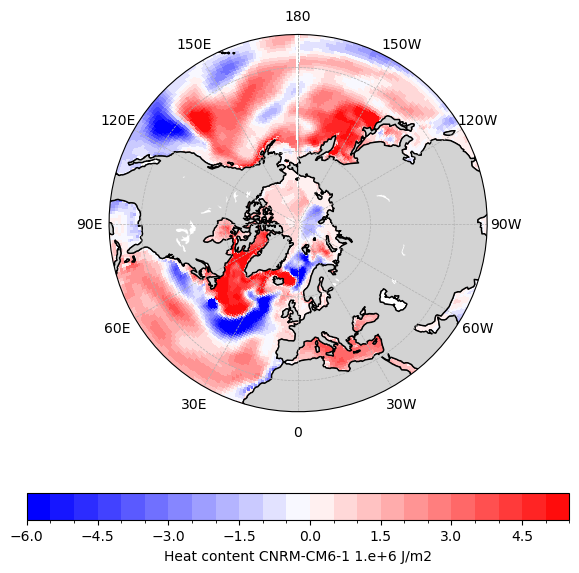

-23.562239999999974
26.558848000000125


/data/softs/anaconda3-2020.07/envs/gloenv_py3.10/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1785: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)


In [11]:
ivar = 0
levels = np.arange(-6, 6, 0.5)
norm = BoundaryNorm(levels, ncolors=250, clip=True)

title = 'Heat content CNRM-CM6-1 1.e+6 J/m2'
fig, ax = prepare_plot()

# Ajouter un titre sur chacun des axes de 30 degrés
angle_labels = ['0', '30W', '60W', '90W', '120W', '150W', '180', '150E', '120E', '90E', '60E', '30E']
angles = np.arange(0, 360, 30)
for angle, label in zip(angles, angle_labels):
    ax.text(angle, 15, label, transform=ccrs.PlateCarree(),
            ha='center', va='center', rotation='horizontal')

z = map_diff_CNRM[ivar, 0, 20, :, :]
print(np.nanmin(z))
print(np.nanmax(z))
cf = plt.pcolormesh(lon_CNRM, lat_CNRM, z, transform=ccrs.PlateCarree(),cmap=cmap, norm = norm)
cbar = fig.colorbar(cf, ax=ax, orientation='horizontal')
cbar.set_label(title)

plt.show()

title = 'Heat content EC-Earth3 1.e+6 J/m2'
fig, ax = prepare_plot()

# Ajouter un titre sur chacun des axes de 30 degrés
angle_labels = ['0', '30W', '60W', '90W', '120W', '150W', '180', '150E', '120E', '90E', '60E', '30E']
angles = np.arange(0, 360, 30)
for angle, label in zip(angles, angle_labels):
    ax.text(angle, 15, label, transform=ccrs.PlateCarree(),
            ha='center', va='center', rotation='horizontal')

z = map_diff_BSC[ivar, 0, 20, :, :]
print(np.nanmin(z))
print(np.nanmax(z))
cf = plt.pcolormesh(lon_BSC, lat_BSC, z, transform=ccrs.PlateCarree(),cmap=cmap, norm = norm)
cbar = fig.colorbar(cf, ax=ax, orientation='horizontal')
cbar.set_label(title)
plt.show()

#### Salt content

-2.268552780151367
0.7002220153808594


/data/softs/anaconda3-2020.07/envs/gloenv_py3.10/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1785: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)


/data/softs/anaconda3-2020.07/envs/gloenv_py3.10/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1785: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)


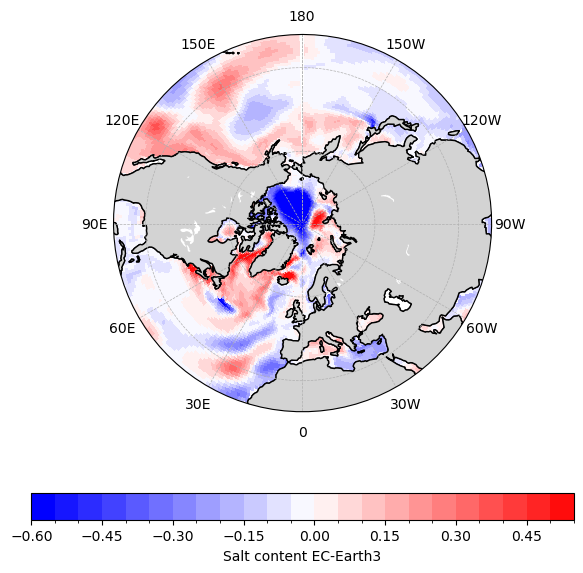

In [12]:
ivar = 1
levels = np.arange(-0.6, 0.6, 0.05)
norm = BoundaryNorm(levels, ncolors=250, clip=True)

title = 'Salt content CNRM-CM6-1'
fig, ax = prepare_plot()

# Ajouter un titre sur chacun des axes de 30 degrés
angle_labels = ['0', '30W', '60W', '90W', '120W', '150W', '180', '150E', '120E', '90E', '60E', '30E']
angles = np.arange(0, 360, 30)
for angle, label in zip(angles, angle_labels):
    ax.text(angle, 15, label, transform=ccrs.PlateCarree(),
            ha='center', va='center', rotation='horizontal')

z = map_diff_CNRM[ivar, 0, 20, :, :]
print(np.nanmin(z))
print(np.nanmax(z))
cf = plt.pcolormesh(lon_CNRM, lat_CNRM, z, transform=ccrs.PlateCarree(),cmap=cmap, norm = norm)
cbar = fig.colorbar(cf, ax=ax, orientation='horizontal')
cbar.set_label(title)
plt.show()

title = 'Salt content EC-Earth3'
fig, ax = prepare_plot()

# Ajouter un titre sur chacun des axes de 30 degrés
angle_labels = ['0', '30W', '60W', '90W', '120W', '150W', '180', '150E', '120E', '90E', '60E', '30E']
angles = np.arange(0, 360, 30)
for angle, label in zip(angles, angle_labels):
    ax.text(angle, 15, label, transform=ccrs.PlateCarree(),
            ha='center', va='center', rotation='horizontal')

z = map_diff_BSC[ivar, 0, 20, :, :]
cf = plt.pcolormesh(lon_BSC, lat_BSC, z, transform=ccrs.PlateCarree(),cmap=cmap, norm = norm)
cbar = fig.colorbar(cf, ax=ax, orientation='horizontal')
cbar.set_label(title)
plt.show()